In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
raw_df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
raw_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
raw_df.shape

(13320, 9)

In [5]:
new_df = raw_df.drop(['area_type', 'availability', 'society'], axis = 'columns')

In [6]:
new_df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
new_df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
new_df2 = new_df.dropna()

In [9]:
new_df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
new_df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [11]:
new_df2['bhk'] = new_df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\user\AppData\Local\Temp/ipykernel_8792/1701071299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['bhk'] = new_df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
new_df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [13]:
new_df2 = new_df2.drop(['size'], axis = 1)

In [14]:
new_df2.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [15]:
new_df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True
        

In [17]:
new_df2[~new_df2['total_sqft'].apply(isFloat)].head()

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2


In [18]:
def convert(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
new_df4 = new_df2.copy()
new_df4['total_sqft'] = new_df4['total_sqft'].apply(convert)

In [20]:
new_df4.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3


In [21]:
new_df5 = new_df4.copy()

In [22]:
new_df5['price_per_sqft'] = new_df5['price']*100000 / new_df5['total_sqft']

In [23]:
new_df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
len(new_df5.location.unique())

1265

In [25]:
new_df5.location = new_df5.location.apply(lambda x: x.strip())

location_stats = new_df5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [26]:
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [27]:
len(location_stats[location_stats <= 10])

1017

In [28]:
location_stat_less_than_ten = location_stats[location_stats <= 10]

In [29]:
location_stat_less_than_ten

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [30]:
new_df5.location = new_df5.location.apply(lambda x: 'other' if x in location_stat_less_than_ten else x)

In [31]:
new_df5[new_df5['total_sqft']/ new_df5['bhk'] < 300].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268


In [32]:
new_df6 = new_df5[~(new_df5['total_sqft']/ new_df5['bhk'] < 300)]

In [33]:
new_df6['price_per_sqft'].describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [35]:
new_df7 = remove_pps_outliers(new_df6)

In [36]:
new_df7

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
9843,other,1256.0,2.0,1.0,65.00,2,5175.159236
9844,other,1353.0,2.0,2.0,110.00,2,8130.081301
9845,other,812.0,1.0,0.0,26.00,1,3201.970443
9846,other,1440.0,2.0,2.0,63.93,3,4439.583333


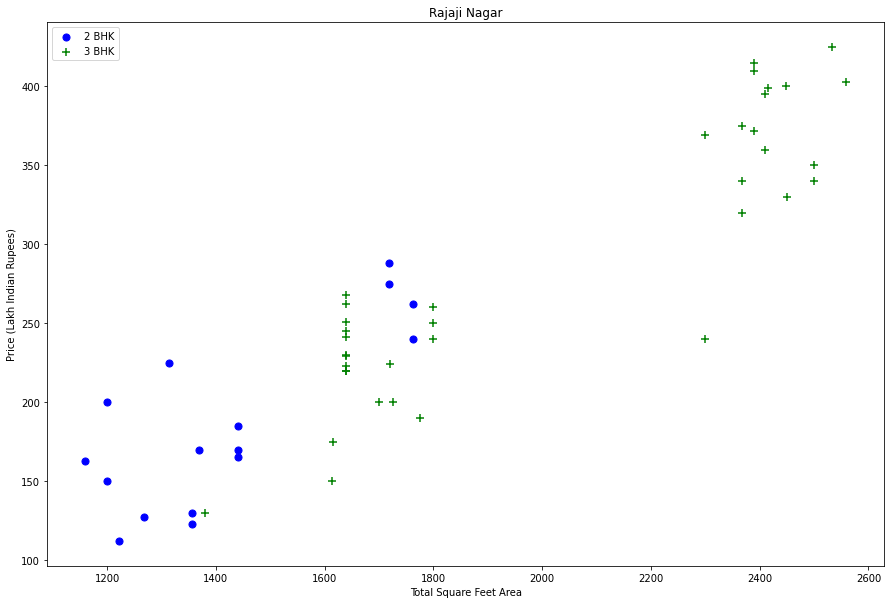

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(new_df7,"Rajaji Nagar")

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [39]:
new_df8 = remove_bhk_outliers(new_df7)

In [40]:
new_df8

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
9838,other,1155.0,2.0,1.0,64.0,2,5541.125541
9840,other,1200.0,2.0,3.0,70.0,2,5833.333333
9841,other,1800.0,1.0,1.0,200.0,1,11111.111111
9844,other,1353.0,2.0,2.0,110.0,2,8130.081301


In [41]:
new_df8[new_df8.bath > new_df8.bhk + 2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8091,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [42]:
new_df9 = new_df8[new_df8.bath < new_df8.bhk + 2]

In [43]:
new_df9

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
9838,other,1155.0,2.0,1.0,64.0,2,5541.125541
9840,other,1200.0,2.0,3.0,70.0,2,5833.333333
9841,other,1800.0,1.0,1.0,200.0,1,11111.111111
9844,other,1353.0,2.0,2.0,110.0,2,8130.081301


In [44]:
new_df10 = new_df9.drop(['price_per_sqft'],axis='columns')
new_df10.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


In [45]:
new_df10

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
...,...,...,...,...,...,...
9838,other,1155.0,2.0,1.0,64.0,2
9840,other,1200.0,2.0,3.0,70.0,2
9841,other,1800.0,1.0,1.0,200.0,1
9844,other,1353.0,2.0,2.0,110.0,2


In [47]:
dummies = pd.get_dummies(new_df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
new_df11 = pd.concat([new_df10, dummies.drop('other', axis = 'columns')], axis = 'columns')

In [52]:
new_df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
new_df12 = new_df11.drop('location', axis = 'columns')

In [54]:
new_df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X = new_df12.drop('price', axis = 'columns')

In [56]:
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
Y = new_df12.price

In [58]:
Y

0       428.0
1       194.0
2       235.0
3       130.0
4       148.0
        ...  
9838     64.0
9840     70.0
9841    200.0
9844    110.0
9845     26.0
Name: price, Length: 6958, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(x_test)

In [68]:
y_pred, y_test

(array([ 49.59354064,  35.72366305,  50.87486937, ...,  71.72109905,
        138.07023205,  77.44243306]),
 4430     57.00
 1441     25.12
 2105     61.25
 7640    108.00
 7529     77.00
          ...  
 3238    110.00
 8932    400.00
 7308     72.00
 7785    120.00
 6963     85.00
 Name: price, Length: 1392, dtype: float64)

In [69]:
model.score(x_test, y_test)

0.8584587986234866